In [10]:
student_id = "2702325470" # change this with your actual student id

import hashlib
student_id_hash = int(hashlib.md5(student_id.encode('utf-8')).hexdigest(), 16)

In [11]:
location_int = student_id_hash % 3

if location_int==0:
    location = 'A'
    max_file = 60
elif location_int==1:
    location = 'B'
    max_file = 44
elif location_int==2:
    location = 'C'
    max_file = 40

In [12]:
file_id = student_id_hash % (max_file-1)

In [13]:
print(f"""Please use the following files:
    * Room-Climate-Datasets/datasets-location_{location}/room_climate-location_{location}-measurement{file_id:02d}.csv
    * Room-Climate-Datasets/datasets-location_{location}/room_climate-location_{location}-measurement{file_id+1:02d}.csv
""")

Please use the following files:
    * Room-Climate-Datasets/datasets-location_B/room_climate-location_B-measurement29.csv
    * Room-Climate-Datasets/datasets-location_B/room_climate-location_B-measurement30.csv



In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import os

In [69]:
dataset_location1 = Path("./datasets-location_A/")
dataset_location2 = Path("./datasets-location_B/")
dataset_location3 = Path("./datasets-location_C/")
datasets = []

for file in dataset_location1.iterdir():
    if file.suffix == ".csv":
        df = pd.read_csv(file, header=None)
        datasets.append(df)
        
for file in dataset_location2.iterdir():
    if file.suffix == ".csv":
        df = pd.read_csv(file, header=None)
        datasets.append(df)

for file in dataset_location3.iterdir():
    if file.suffix == ".csv":
        df = pd.read_csv(file, header=None)
        datasets.append(df)

data = pd.concat(datasets, ignore_index=True)


In [70]:
data.nunique()

all_folders = ["./datasets-location_A/", "./datasets-location_B/", "./datasets-location_C/"]

processed_data = []

for all_in in all_folders:
    for filename in os.listdir(all_in):
        if filename.endswith(".csv"):
            file_path = os.path.join(all_in, filename)

            df = pd.read_csv(file_path, header=None)

            df = df.drop(columns=[8, 9, 10, 11])

            processed_data.append(df)

data = pd.concat(processed_data, ignore_index=True)


In [ ]:
A = data[4] # Temperature
B = data[5] # Relative humidity
C = data[6] # Light sensor 1
D = data[7] # Light sensor 2

A_train, A_temp, B_train, B_temp, C_train, C_temp, D_train, D_temp = train_test_split(A, B, C, D, test_size=0.2, random_state=42)
A_val, A_test, B_val, B_test, C_val, C_test, D_val, D_test = train_test_split(A_temp, B_temp, C_temp, D_temp, test_size=0.5, random_state=42)

In [72]:
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train.values.reshape(-1, 1))
A_val   = scaler.transform(A_val.values.reshape(-1, 1))
A_test  = scaler.transform(A_test.values.reshape(-1, 1))

B_train = scaler.fit_transform(B_train.values.reshape(-1, 1))
B_val   = scaler.transform(B_val.values.reshape(-1, 1))
B_test  = scaler.transform(B_test.values.reshape(-1, 1))

C_train = scaler.fit_transform(C_train.values.reshape(-1, 1))
C_val   = scaler.transform(C_val.values.reshape(-1, 1))
C_test  = scaler.transform(C_test.values.reshape(-1, 1))

D_train = scaler.fit_transform(D_train.values.reshape(-1, 1))
D_val   = scaler.transform(D_val.values.reshape(-1, 1))
D_test  = scaler.transform(D_test.values.reshape(-1, 1))

A_train = scaler.fit_transform(A_train)
A_val = scaler.transform(A_val)
A_test = scaler.transform(A_test)

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(A_train.shape[1], )),
    
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(optimizer="adam", loss="mae", metrics=["mae"])

C:\Users\Pongo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
history = model.fit(
    A_train,
    B_train,
    epochs=100,
    batch_size=256,
    validation_data=[A_val, B_val]
)

Epoch 1/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7704 - mae: 0.7704 - val_loss: 0.7575 - val_mae: 0.7575
Epoch 2/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7583 - mae: 0.7583 - val_loss: 0.7548 - val_mae: 0.7548
Epoch 3/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7565 - mae: 0.7565 - val_loss: 0.7553 - val_mae: 0.7553
Epoch 4/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7549 - mae: 0.7549 - val_loss: 0.7543 - val_mae: 0.7543
Epoch 5/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7541 - mae: 0.7541 - val_loss: 0.7538 - val_mae: 0.7538
Epoch 6/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7530 - mae: 0.7530 - val_loss: 0.7511 - val_mae: 0.7511
Epoch 7/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7523 - mae: 0.7523 - val_loss: 0.7515 - val_mae: 0.7515
Epoch 8/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7510 - mae: 0.7510 - val_loss: 0.7509 - val_mae: 0.7509
Epoch 9/100
1689/1689 ━━━━━━━━━━

In [75]:
history = model.fit(
    C_train,
    D_train,
    epochs=100,
    batch_size=256,
    validation_data=[C_val, D_val]
)

Epoch 1/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1746 - mae: 0.1746 - val_loss: 0.1685 - val_mae: 0.1685
Epoch 2/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1690 - mae: 0.1690 - val_loss: 0.1684 - val_mae: 0.1684
Epoch 3/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1688 - mae: 0.1688 - val_loss: 0.1673 - val_mae: 0.1673
Epoch 4/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1686 - mae: 0.1686 - val_loss: 0.1681 - val_mae: 0.1681
Epoch 5/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1686 - mae: 0.1686 - val_loss: 0.1674 - val_mae: 0.1674
Epoch 6/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1685 - mae: 0.1685 - val_loss: 0.1682 - val_mae: 0.1682
Epoch 7/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1685 - mae: 0.1685 - val_loss: 0.1675 - val_mae: 0.1675
Epoch 8/100
1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1685 - mae: 0.1685 - val_loss: 0.1679 - val_mae: 0.1679
Epoch 9/100
1689/1689 ━━━━━━━━━━

In [77]:
loss, mae = model.evaluate(A_test, B_test)
print(f"Training Loss: {loss:.4f}")
print(f"Training MAE: {mae:4f}")

1689/1689 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9684 - mae: 0.9684
Training Loss: 0.9684
Training MAE: 0.968364


In [78]:
loss, mae = model.evaluate(C_test, D_test)
print(f"Training Loss: {loss:.4f}")
print(f"Training MAE: {mae:4f}")

1689/1689 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1682 - mae: 0.1682
Training Loss: 0.1682
Training MAE: 0.168190


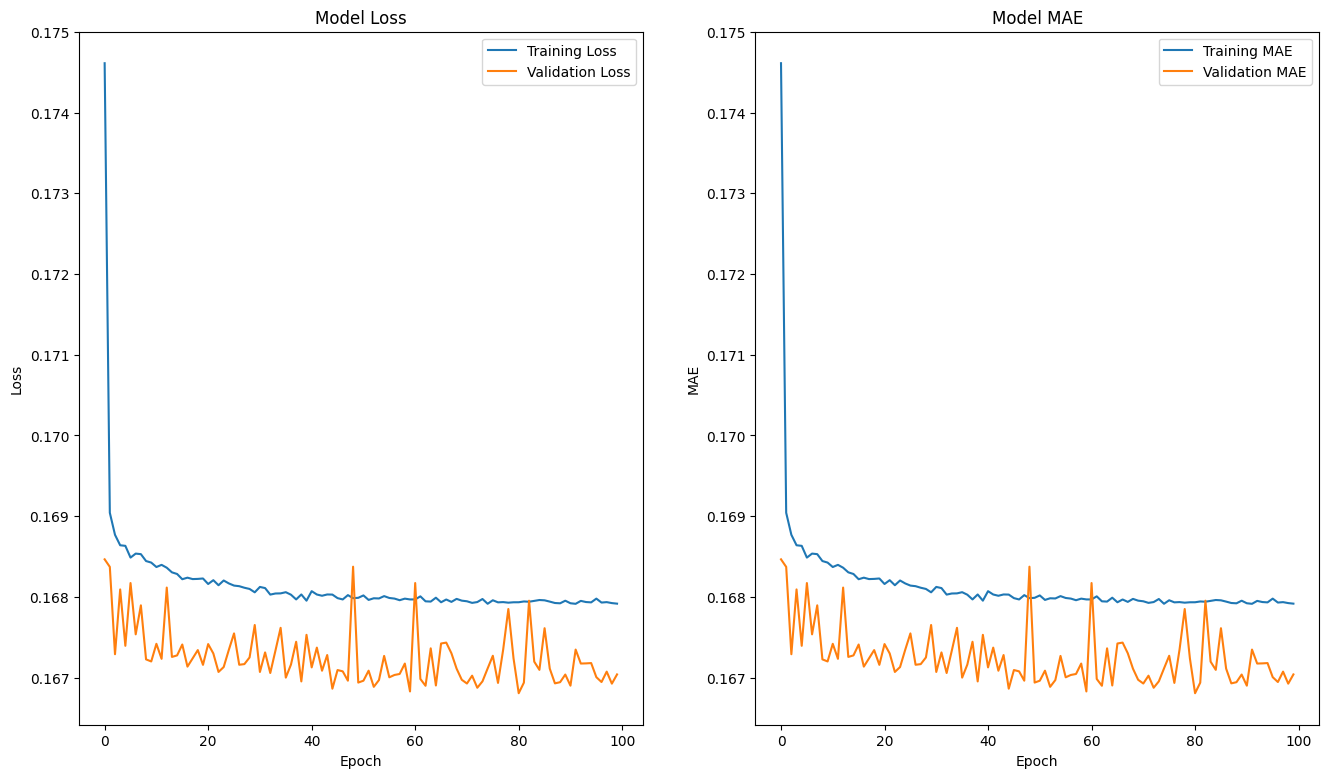

In [79]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["mae"], label="Training MAE")
plt.plot(history.history["val_mae"], label="Validation MAE")
plt.title("Model MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.show()

In [85]:
prediction1 = model.predict(A_test[:30]).flatten()
previous1 = A_test[:30]

print("Improved predicted")
for pred1, prev1 in zip(prediction1, previous1):
    print(f"Predicted A: ", pred1, "Previous A: ", prev1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Improved predicted
Predicted A:  -0.24954942 Previous A:  [-0.1727362]
Predicted A:  0.6279634 Previous A:  [0.70526149]
Predicted A:  -0.555122 Previous A:  [-0.44711048]
Predicted A:  0.084582 Previous A:  [0.19766908]
Predicted A:  1.3735721 Previous A:  [1.43235333]
Predicted A:  -1.1029809 Previous A:  [-1.54460759]
Predicted A:  -0.31449935 Previous A:  [-0.24132977]
Predicted A:  0.8846109 Previous A:  [0.89732349]
Predicted A:  0.99976325 Previous A:  [0.97963577]
Predicted A:  1.0566069 Previous A:  [1.02079191]
Predicted A:  -0.42678997 Previous A:  [-0.33736077]
Predicted A:  1.0189552 Previous A:  [0.99335448]
Predicted A:  0.19747555 Previous A:  [0.30741879]
Predicted A:  -1.0414875 Previous A:  [-1.47601402]
Predicted A:  -0.86313987 Previous A:  [-1.29767074]
Predicted A:  -0.24954942 Previous A:  [-0.1727362]
Predicted A:  -0.6353296 Previous A:  [-0.51570405]
Predicted A:  2.047227 Previous A:  [1.87135217]
Predicted A:  -0.026670

In [86]:
prediction2 = model.predict(B_test[:30]).flatten()
previous2 = B_test[:30]

print("Improved predicted")
for pred2, prev2 in zip(prediction2, previous2):
    print(f"Predicted B: ", pred2, "Previous B: ", prev2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Improved predicted
Predicted B:  -0.69788134 Previous B:  [-0.57491753]
Predicted B:  -0.94530284 Previous B:  [-1.37983191]
Predicted B:  1.7835876 Previous B:  [1.68558483]
Predicted B:  -0.69013405 Previous B:  [-0.80039532]
Predicted B:  2.1489427 Previous B:  [1.94302386]
Predicted B:  0.11517295 Previous B:  [0.23651632]
Predicted B:  -1.0097041 Previous B:  [-1.44423143]
Predicted B:  1.5104496 Previous B:  [1.57602615]
Predicted B:  0.009076983 Previous B:  [0.146357]
Predicted B:  1.2831618 Previous B:  [1.28614885]
Predicted B:  0.7258407 Previous B:  [0.78383266]
Predicted B:  0.93316555 Previous B:  [0.93203104]
Predicted B:  -0.94108474 Previous B:  [-1.14163323]
Predicted B:  -0.14866784 Previous B:  [-0.05972144]
Predicted B:  -0.56902266 Previous B:  [-0.45899841]
Predicted B:  -0.56902266 Previous B:  [-0.45899841]
Predicted B:  -0.93687725 Previous B:  [-1.13527278]
Predicted B:  0.46349403 Previous B:  [0.54563397]
Predicted B:  

In [87]:
prediction3 = model.predict(C_test[:30]).flatten()
previous3 = C_test[:30]

print("Improved predicted")
for pred3, prev3 in zip(prediction3, previous3):
    print(f"Predicted C: ", pred3, "Previous C: ", prev3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Improved predicted
Predicted C:  -1.2082136 Previous C:  [-1.80825742]
Predicted C:  -0.72023475 Previous C:  [-0.59810391]
Predicted C:  -0.79127526 Previous C:  [-0.91516413]
Predicted C:  -0.86745787 Previous C:  [-1.03033041]
Predicted C:  0.24801207 Previous C:  [0.35267336]
Predicted C:  -0.72023475 Previous C:  [-0.59810391]
Predicted C:  -0.7480403 Previous C:  [-0.6269459]
Predicted C:  0.6204777 Previous C:  [0.69837387]
Predicted C:  -0.79127526 Previous C:  [-0.91516413]
Predicted C:  1.2060837 Previous C:  [1.15944236]
Predicted C:  0.013666302 Previous C:  [0.15098111]
Predicted C:  2.6327143 Previous C:  [2.39843785]
Predicted C:  -0.5295644 Previous C:  [-0.42525365]
Predicted C:  -0.21876004 Previous C:  [-0.13703543]
Predicted C:  -0.8295293 Previous C:  [-0.71347188]
Predicted C:  1.1749896 Previous C:  [1.13060037]
Predicted C:  2.3448985 Previous C:  [2.13906162]
Predicted C:  -0.10162035 Previous C:  [-0.02186915]
Predicted C:

In [88]:
prediction4 = model.predict(D_test[:30]).flatten()
previous4 = D_test[:30]

print("Improved predicted")
for pred4, prev4 in zip(prediction4, previous4):
    print(f"Predicted D: ", pred4, "Previous A: ", prev4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Improved predicted
Predicted D:  -0.9284283 Previous A:  [-1.18323516]
Predicted D:  -0.84154284 Previous A:  [-0.72951913]
Predicted D:  -0.77994907 Previous A:  [-0.89804223]
Predicted D:  -0.6124991 Previous A:  [-0.49617946]
Predicted D:  0.37133363 Previous A:  [0.46310586]
Predicted D:  -0.79693794 Previous A:  [-0.67766587]
Predicted D:  -0.8094355 Previous A:  [-0.69062919]
Predicted D:  0.83934724 Previous A:  [0.86496862]
Predicted D:  -0.8094355 Previous A:  [-0.69062919]
Predicted D:  1.2240294 Previous A:  [1.17608819]
Predicted D:  -0.29417667 Previous A:  [-0.22394984]
Predicted D:  2.8511703 Previous A:  [2.58908953]
Predicted D:  -0.77194285 Previous A:  [-0.65173924]
Predicted D:  -0.3093349 Previous A:  [-0.23691316]
Predicted D:  -0.7915617 Previous A:  [-0.78137239]
Predicted D:  1.1681271 Previous A:  [1.12423493]
Predicted D:  2.4990375 Previous A:  [2.27796997]
Predicted D:  -0.8094355 Previous A:  [-0.69062919]
Predicted D: